In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import os
import tensorflow as tf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Diabtic Retinopathy/sample csv.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
import matplotlib.pyplot as plt # Plotting
import seaborn as sns # Plotting


In [6]:
from PIL import Image
import cv2

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, Dataset
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision
import torch.optim as optim
import torchvision.models as models # Pre-Trained models

In [8]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score,accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer

In [9]:
import pandas as pd
import numpy as np
import itertools
import os
import sys
import pickle
from random import shuffle
from sklearn.model_selection import train_test_split
import multiprocessing
from multiprocessing.pool import ThreadPool
from tqdm import tqdm_notebook

In [10]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False

In [11]:
import sklearn
from sklearn.metrics import cohen_kappa_score, accuracy_score

In [12]:
import time
import os
from tqdm import tqdm_notebook

In [13]:
import pickle
from random import shuffle
from sklearn.model_selection import train_test_split
import multiprocessing
from multiprocessing.pool import ThreadPool
from tqdm import tqdm_notebook

from sklearn.metrics import confusion_matrix, cohen_kappa_score,accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer

import tensorflow.keras as keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers,Model,Sequential
from keras.layers import Input,GlobalAveragePooling2D,Dropout,Dense,Activation,BatchNormalization,GlobalMaxPooling2D,concatenate,Flatten
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,Callback
from keras.initializers import random_normal
from keras.models import load_model
from keras.losses import binary_crossentropy,categorical_crossentropy,mean_squared_error
from keras import backend as K

In [14]:
from PIL import Image
import cv2
import tensorflow as tf

In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #Use GPU if it's available or else use CPU.
print(device)

cpu


In [16]:
import os

# os.chdir('/content/drive/MyDrive/IMAGE PROCESSING /')
# print("We are currently in the folder of ",os.getcwd())

In [18]:
data = pd.read_csv('/content/drive/MyDrive/DIABTIC RETINOPATHY/sample csv.csv')
print('Train Size = {}'.format(len(data)))
data.head()

FileNotFoundError: ignored

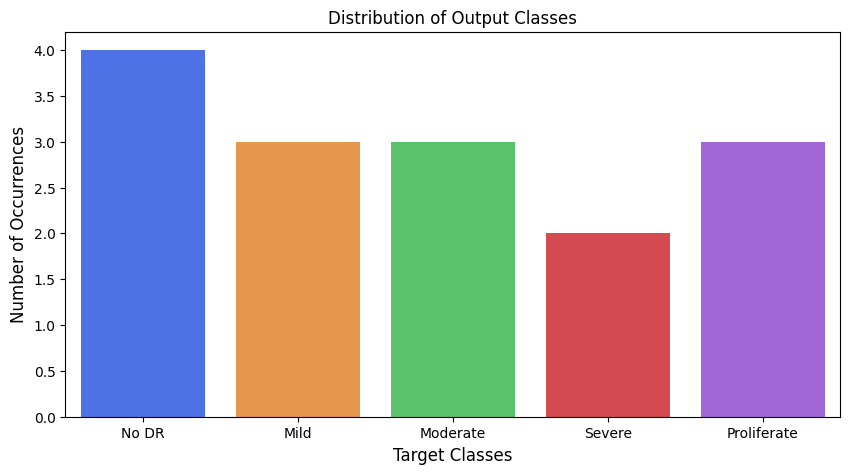

In [ ]:
counts = data['diagnosis'].value_counts()
class_list = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferate']
for i,x in enumerate(class_list):
    counts[x] = counts.pop(i)

plt.figure(figsize=(10,5))
sns.barplot(x=counts.index, y=counts.values, alpha=0.8, palette='bright')
plt.title('Distribution of Output Classes')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Target Classes', fontsize=12)
plt.show()

In [ ]:
from sklearn.utils import class_weight #For calculating weights for each class.
class_weights = class_weight.compute_class_weight(class_weight='balanced',classes=np.array([0,1,2,3,4]),y=data['diagnosis'].values)
class_weights = torch.tensor(class_weights,dtype=torch.float).to(device)
 
print(class_weights)

tensor([0.7500, 1.0000, 1.0000, 1.5000, 1.0000])


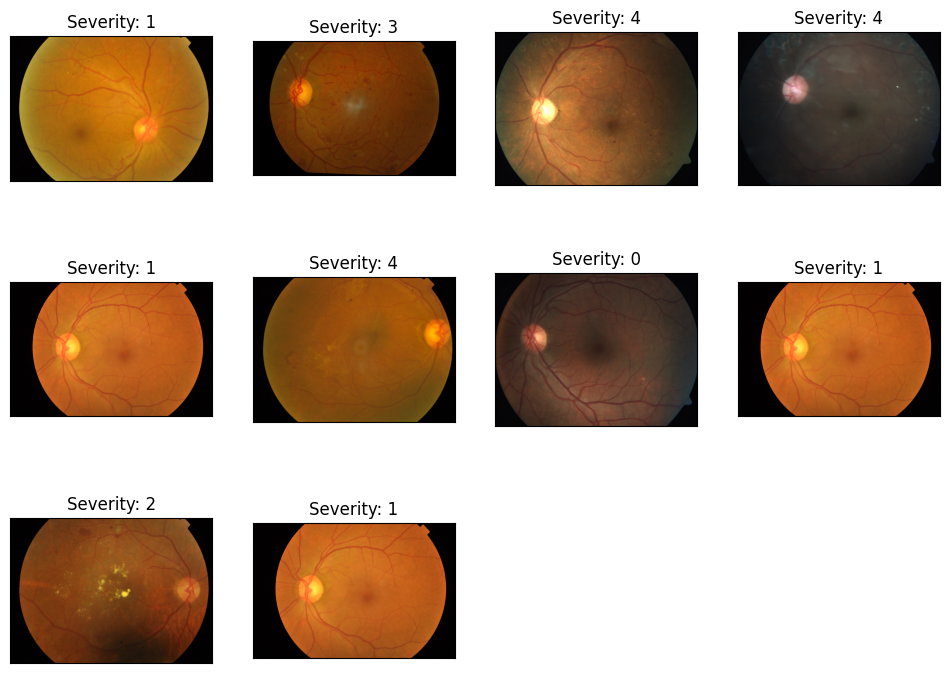

In [ ]:
fig = plt.figure(figsize=(12, 12))
# displaying 15 images
train_imgs = os.listdir("/content/drive/MyDrive/Diabtic Retinopathy/Sample images")
for idx, img in enumerate(np.random.choice(train_imgs, 10)):
    ax = fig.add_subplot(4, 4, idx+1, xticks=[], yticks=[])
    im = Image.open('/content/drive/MyDrive/Diabtic Retinopathy/Sample images/' + img)
    plt.imshow(im)
    lab = data.loc[data['id_code'] == img.split('.')[0], 'diagnosis'].values[0]
    ax.set_title('Severity: %s'%lab)

In [ ]:
import sys

In [ ]:
class dataset(Dataset):
    def __init__(self,df,data_path,image_transform=None, train=True):
        super(Dataset,self).__init__()
        self.df = df
        self.data_path = data_path
        self.image_transform = image_transform
        self.train = train
    def __len__(self):
        return len(self.df)
    def __getitem__(self,index):
        image_id = self.df['id_code'][index]
        image = Image.open(f'{self.data_path}/{image_id}.png')
        if self.image_transform :
            image = self.image_transform(image)
        if self.train :
            label = self.df['diagnosis'][index]
            return image,label
        else:
            return image
        

In [ ]:
image_transform = transforms.Compose([transforms.Resize([512,512]),
                                      transforms.ToTensor(),
                                      torchvision.transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]) #Transformations to apply to the image.
data_set = dataset(data,'/content/drive/MyDrive/Diabtic Retinopathy/Sample images',image_transform=image_transform)

#Split the data_set so that valid_set contains 0.1 samples of the data_set. 
train_set,valid_set = torch.utils.data.random_split(data_set,[10,5],generator=torch.Generator().manual_seed(42))

In [ ]:
train_dataloader = DataLoader(train_set,batch_size=32,shuffle=True)
valid_dataloader = DataLoader(valid_set,batch_size=32,shuffle=False)

In [ ]:
model = models.resnet34(pretrained=True)
model.fc = nn.Sequential(nn.Linear(512,256), nn.Dropout(p=0.2), nn.
                        Linear(256,128), nn.Dropout(p=0.5), nn.Linear(128,64), nn.Linear(64,5))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 352MB/s]


In [ ]:
from torchsummary import summary

In [ ]:
model = models.resnet34(pretrained=True)
summary(model, (3, 320, 320))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 160, 160]           9,408
       BatchNorm2d-2         [-1, 64, 160, 160]             128
              ReLU-3         [-1, 64, 160, 160]               0
         MaxPool2d-4           [-1, 64, 80, 80]               0
            Conv2d-5           [-1, 64, 80, 80]          36,864
       BatchNorm2d-6           [-1, 64, 80, 80]             128
              ReLU-7           [-1, 64, 80, 80]               0
            Conv2d-8           [-1, 64, 80, 80]          36,864
       BatchNorm2d-9           [-1, 64, 80, 80]             128
             ReLU-10           [-1, 64, 80, 80]               0
       BasicBlock-11           [-1, 64, 80, 80]               0
           Conv2d-12           [-1, 64, 80, 80]          36,864
      BatchNorm2d-13           [-1, 64, 80, 80]             128
             ReLU-14           [-1, 64,

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    model.train()
    total = 0
    correct = 0
    running_loss = 0
    for batch,(x,y) in enumerate(dataloader):
        output = model(x.to(device))
        loss = loss_fn(output,y.to(device))
        running_loss += loss.item()
        total += y.size(0)
        predictions = output.argmax(dim=1).cpu().detach()
        correct += (predictions == y.cpu().detach()).sum().item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    avg_loss = running_loss/len(dataloader)
    avg_acc = 100*(correct/total)
    
    print(f'\nTraining Loss per Batch = {avg_loss:.6f}', end='\t')
    print(f'Accuracy on Training Set = {100*(correct/total):.6f}% [{correct}/{total}]')
    
    return avg_loss, avg_acc

In [ ]:
def validate(dataloader,model,loss_fn):
    model.eval()
    total = 0
    correct = 0
    running_loss = 0
    with torch.no_grad():
        for x,y in dataloader:
            output = model(x.to(device))
            loss = loss_fn(output,y.to(device)).item()
            running_loss += loss
            total += y.size(0)
            predictions = output.argmax(dim=1).cpu().detach()
            correct += (predictions == y.cpu().detach()).sum().item()
    avg_loss = running_loss/len(dataloader)
    avg_acc = 100*(correct/total)
    
    print(f'\nValid Loss per Batch = {avg_loss:.6f}', end='\t')
    print(f'Accuracy on Validation Set = {100*(correct/total):.6f}% [{correct}/{total}]')
    
    return avg_loss, avg_acc

In [ ]:
def optimize(train_dataloader,valid_dataloader,model,loss_fn,optimize,nb_epochs):
    train_losses = []
    valid_losses = []
    train_acc = []
    valid_acc = []
    
    for epoch in range(nb_epochs):
        print(f'\nEpoch {epoch+1}/{nb_epochs}')
        print('------------------------------')
        train_loss, train_a = train(train_dataloader,model,loss_fn,optimizer)
        train_losses.append(train_loss)
        train_acc.append(train_a)
        valid_loss, valid_a = validate(valid_dataloader,model,loss_fn)
        valid_losses.append(valid_loss)
        valid_acc.append(valid_a)
    
    print('\nTraining has completed!')
    return train_losses, valid_losses, train_acc, valid_acc

In [ ]:
#list(model.parameters())

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)
nb_epochs = 10
train_losses, valid_losses, train_acc, valid_acc = optimize(train_dataloader,valid_dataloader,model,loss_fn,optimizer,nb_epochs)


Epoch 1/10
------------------------------

Training Loss per Batch = 8.112117	Accuracy on Training Set = 0.000000% [0/10]

Valid Loss per Batch = 7.496778	Accuracy on Validation Set = 0.000000% [0/5]

Epoch 2/10
------------------------------

Training Loss per Batch = 7.596739	Accuracy on Training Set = 0.000000% [0/10]

Valid Loss per Batch = 7.729079	Accuracy on Validation Set = 0.000000% [0/5]

Epoch 3/10
------------------------------

Training Loss per Batch = 7.370580	Accuracy on Training Set = 0.000000% [0/10]

Valid Loss per Batch = 7.238210	Accuracy on Validation Set = 0.000000% [0/5]

Epoch 4/10
------------------------------

Training Loss per Batch = 6.772819	Accuracy on Training Set = 10.000000% [1/10]

Valid Loss per Batch = 7.298579	Accuracy on Validation Set = 0.000000% [0/5]

Epoch 5/10
------------------------------

Training Loss per Batch = 6.621137	Accuracy on Training Set = 0.000000% [0/10]

Valid Loss per Batch = 7.093595	Accuracy on Validation Set = 0.000000% 

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import random
from torchsummary import summary

In [ ]:
#tf.keras.models.save_model( model,"F:/model.h5")

In [ ]:
epochs = range(10)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, valid_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Acuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

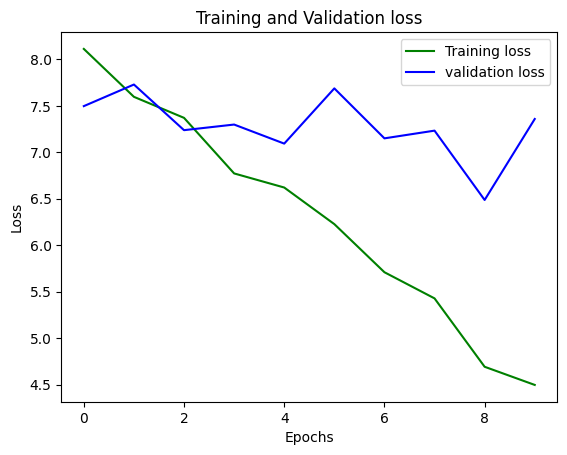

In [ ]:
epochs = range(10)
plt.plot(epochs, train_losses, 'g', label='Training loss')
plt.plot(epochs, valid_losses, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.eval()
results = []

i = 0
j = 0
k = 0
l = 0
m = 0
for x,y in DataLoader(data_set):
    if(y.numpy()[0] == 0 and i<20):
        result = model(x.to(device)).argmax(dim=1).cpu().detach()
        results.append((result.numpy()[0], y.numpy()[0]))
        i = i+1
    if(y.numpy()[0] == 1 and j<20):
        result = model(x.to(device)).argmax(dim=1).cpu().detach()
        results.append((result.numpy()[0], y.numpy()[0]))
        j = j+1
    if(y.numpy()[0] == 2 and k<20):
        result = model(x.to(device)).argmax(dim=1).cpu().detach()
        results.append((result.numpy()[0], y.numpy()[0]))
        k = k+1
    if(y.numpy()[0] == 3 and l<20):
        result = model(x.to(device)).argmax(dim=1).cpu().detach()
        results.append((result.numpy()[0], y.numpy()[0]))
        l = l+1
    if(y.numpy()[0] == 4 and m<20):
        result = model(x.to(device)).argmax(dim=1).cpu().detach()
        results.append((result.numpy()[0], y.numpy()[0]))
        m = m+1
    if(i+j+k+l+m >= 100):
        break

In [ ]:
i, j, k, l, m

(4, 3, 3, 2, 3)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
labelis = [val[1] for val in results]
predis = [val[0] for val in results]
count = 0
for x,y in results:
    if x == y:
        count += 1
cm = confusion_matrix(labelis, predis, labels = [0, 1, 2, 3, 4])
print('accuracy', 100*(count)/len(predis))
cm

accuracy 20.0


array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [ ]:
cm_df = pd.DataFrame(cm,
                    index = ['0', '1', '2', '3', '4'],
                    columns = ['0', '1', '2', '3', '4'])
cm_df

,0,1,2,3,4
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
total = sum(cm_df.sum(axis = 1))

In [ ]:
arr = np.array(cm_df)
cnfm = []
for i in range(0,5):
    TP = arr[:][i][i]
    FN = sum(arr[:][i]) - arr[:][i][i]
    FP = cm_df.sum(axis=0)[i] - arr[:][i][i]
    TN = total - TP
    precision = TP / (TP+FP)
    recall = TP / (TP+FN)
    f1 = 2*precision*recall/(precision+recall)
    cnfm.append([i, TP,FN,FP,TN, precision, recall,f1])
f1_result = pd.DataFrame(cnfm, columns = ['severity', 'True Positive', 'False Negative', 'False Possitive', 'True Negative', 'Precision', 'Recall', 'F1-score'])
f1_result

<ipython-input-47-329938a849d6>:8: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP / (TP+FP)
<ipython-input-47-329938a849d6>:9: RuntimeWarning: invalid value encountered in long_scalars
  recall = TP / (TP+FN)
<ipython-input-47-329938a849d6>:8: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP / (TP+FP)
<ipython-input-47-329938a849d6>:9: RuntimeWarning: invalid value encountered in long_scalars
  recall = TP / (TP+FN)


,severity,True Positive,False Negative,False Possitive,True Negative,Precision,Recall,F1-score
0,0,1,0,0,2,1.0,1.0,1.0
1,1,1,0,0,2,1.0,1.0,1.0
2,2,0,0,0,3,NaN,NaN,NaN
3,3,0,0,0,3,NaN,NaN,NaN
4,4,1,0,0,2,1.0,1.0,1.0


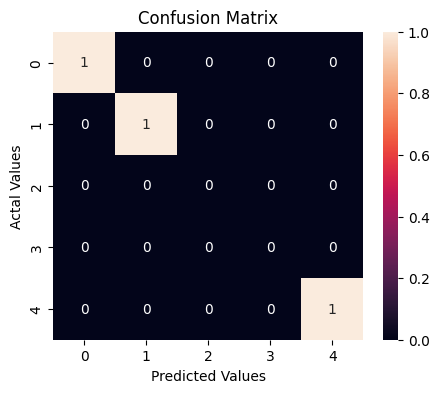

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, auc

def test_class_probabilities(model, test_loader):
    model.eval()
    actuals = []
    probabilities = []
    i = 0
    j = 0
    k = 0
    l = 0
    f = 0
    with torch.no_grad():
        for x, y in test_loader:
          y = y.numpy()[0]
          outputs = model(x.to(device))
          prediction = outputs.argmax(dim=1, keepdim=True).cpu().detach()
          # if (prediction.numpy()[0] == y):
          if (y == 0 and i<10):
            actuals.append(y)
            values = outputs.cpu().detach().numpy()[0]
            m = -1*min(values)
            values = [val+m for val in values]
            prob = values/sum(values)
            probabilities.append(np.exp(prob))
            i = i+1
          if (y == 1 and j<10):
            actuals.append(y)
            values = outputs.cpu().detach().numpy()[0]
            m = -1*min(values)
            values = [val+m for val in values]
            prob = values/sum(values)
            probabilities.append(np.exp(prob))
            j = j+1
          if (y == 2 and k<10):
            actuals.append(y)
            values = outputs.cpu().detach().numpy()[0]
            m = -1*min(values)
            values = [val+m for val in values]
            prob = values/sum(values)
            probabilities.append(np.exp(prob))
            k = k+1
          if (y == 3 and l<10):
            actuals.append(y)
            values = outputs.cpu().detach().numpy()[0]
            m = -1*min(values)
            values = [val+m for val in values]
            prob = values/sum(values)
            probabilities.append(np.exp(prob))
            l = l+1
          if (y == 4 and f<10):
            actuals.append(y)
            values = outputs.cpu().detach().numpy()[0]
            m = -1*min(values)
            values = [val+m for val in values]
            prob = values/sum(values)
            probabilities.append(np.exp(prob))
            f = f+1
          if(i+j+k+l+f >=50):
            break
    return actuals,probabilities

In [ ]:
def plot_roc( actuals,  probabilities):
    """
    compute ROC curve and ROC area for each class in each fold

    """
    fpr = {}
    tpr = {}
    thresh ={}
    roc_auc = {}
    n_class = 5

    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(actuals, [val[i] for val in probabilities], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

        
    # plotting    
    plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label="Class 0 vs Rest (area = %0.2f)" % roc_auc[0])
    plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label="Class 1 vs Rest (area = %0.2f)" % roc_auc[1])
    plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label="Class 2 vs Rest (area = %0.2f)" % roc_auc[2])
    plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label="Class 3 vs Rest (area = %0.2f)" % roc_auc[3])
    plt.plot(fpr[3], tpr[3], linestyle='--',color='purple', label="Class 4 vs Rest (area = %0.2f)" % roc_auc[4])
    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')

In [ ]:
act, prob = test_class_probabilities(model, DataLoader(data_set))

[0, 0, 0, 0, 1, 1, 2, 3, 2, 2, 3, 4, 1, 4, 4]


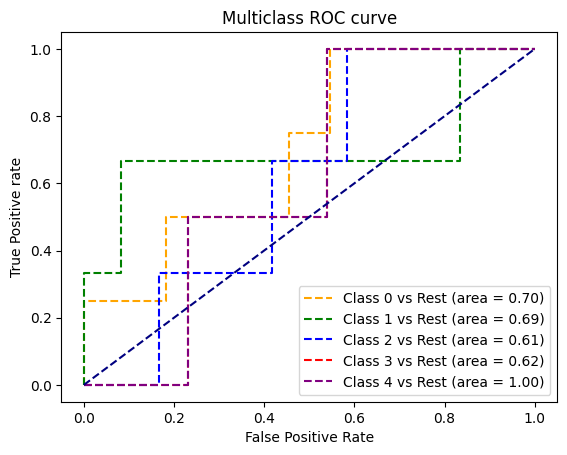

In [ ]:
plot_roc(act, prob)
print(act)